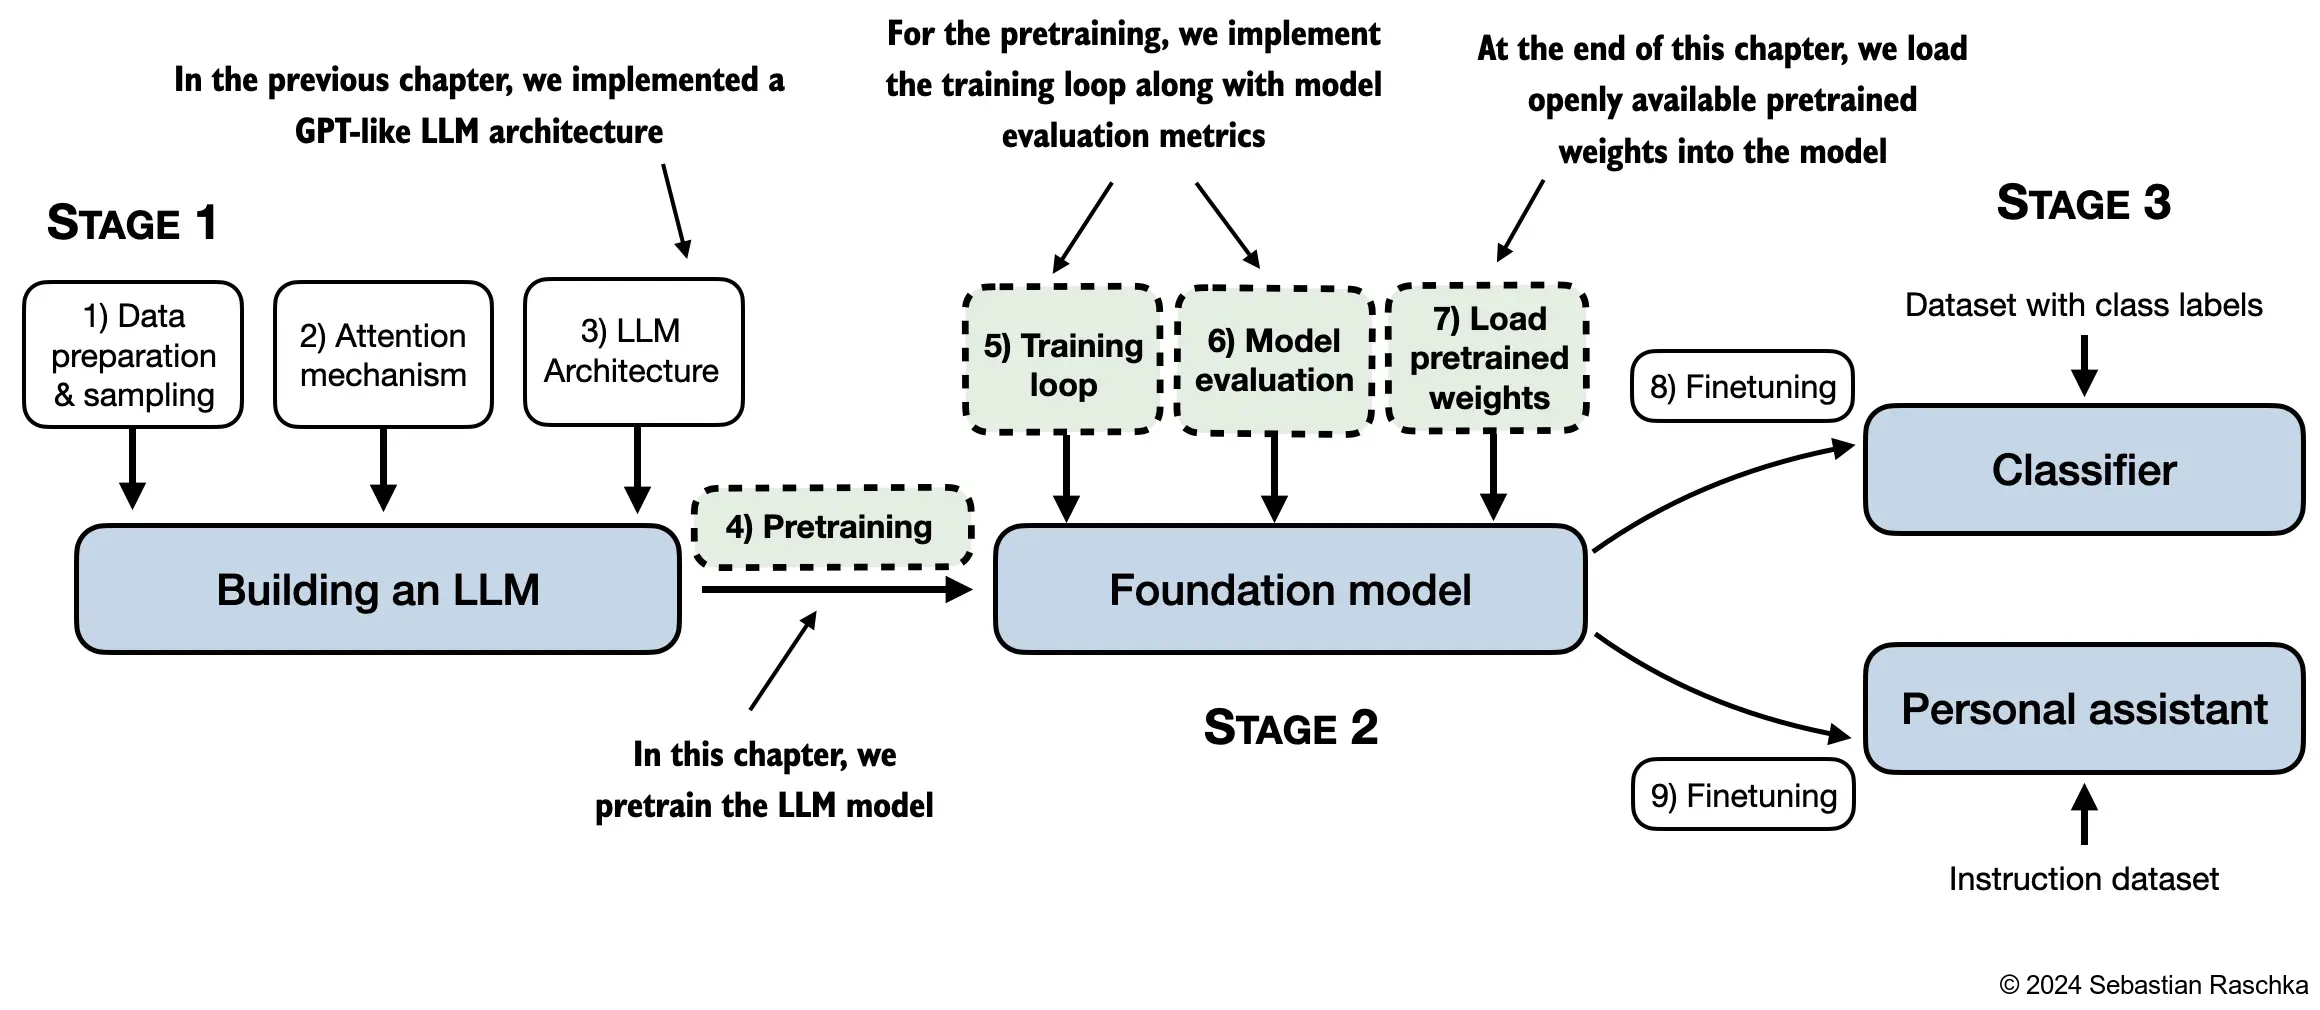

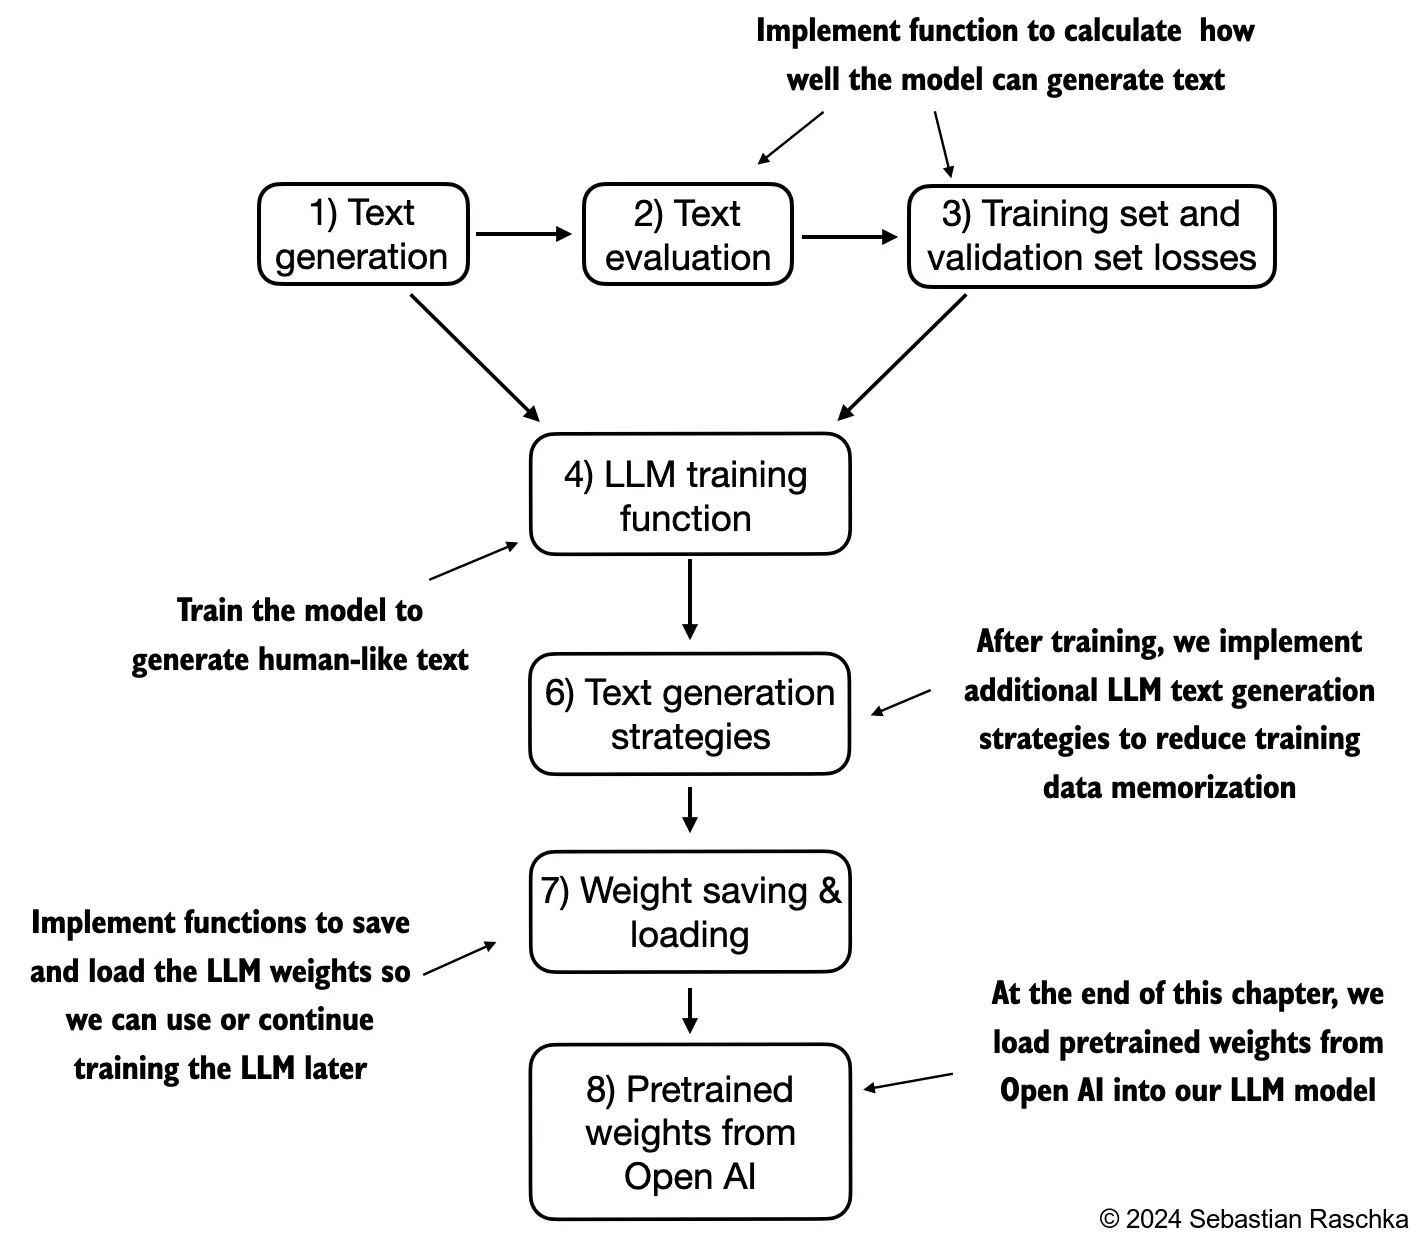

# Loss Function

In [1]:
# import sys
# sys.path.append("/media/wangjz/D42A-3E73/llm/LLMScratch")

from test_diy import GPT2
from test_diy.GPT2 import GPTModel
import torch.nn as nn
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features

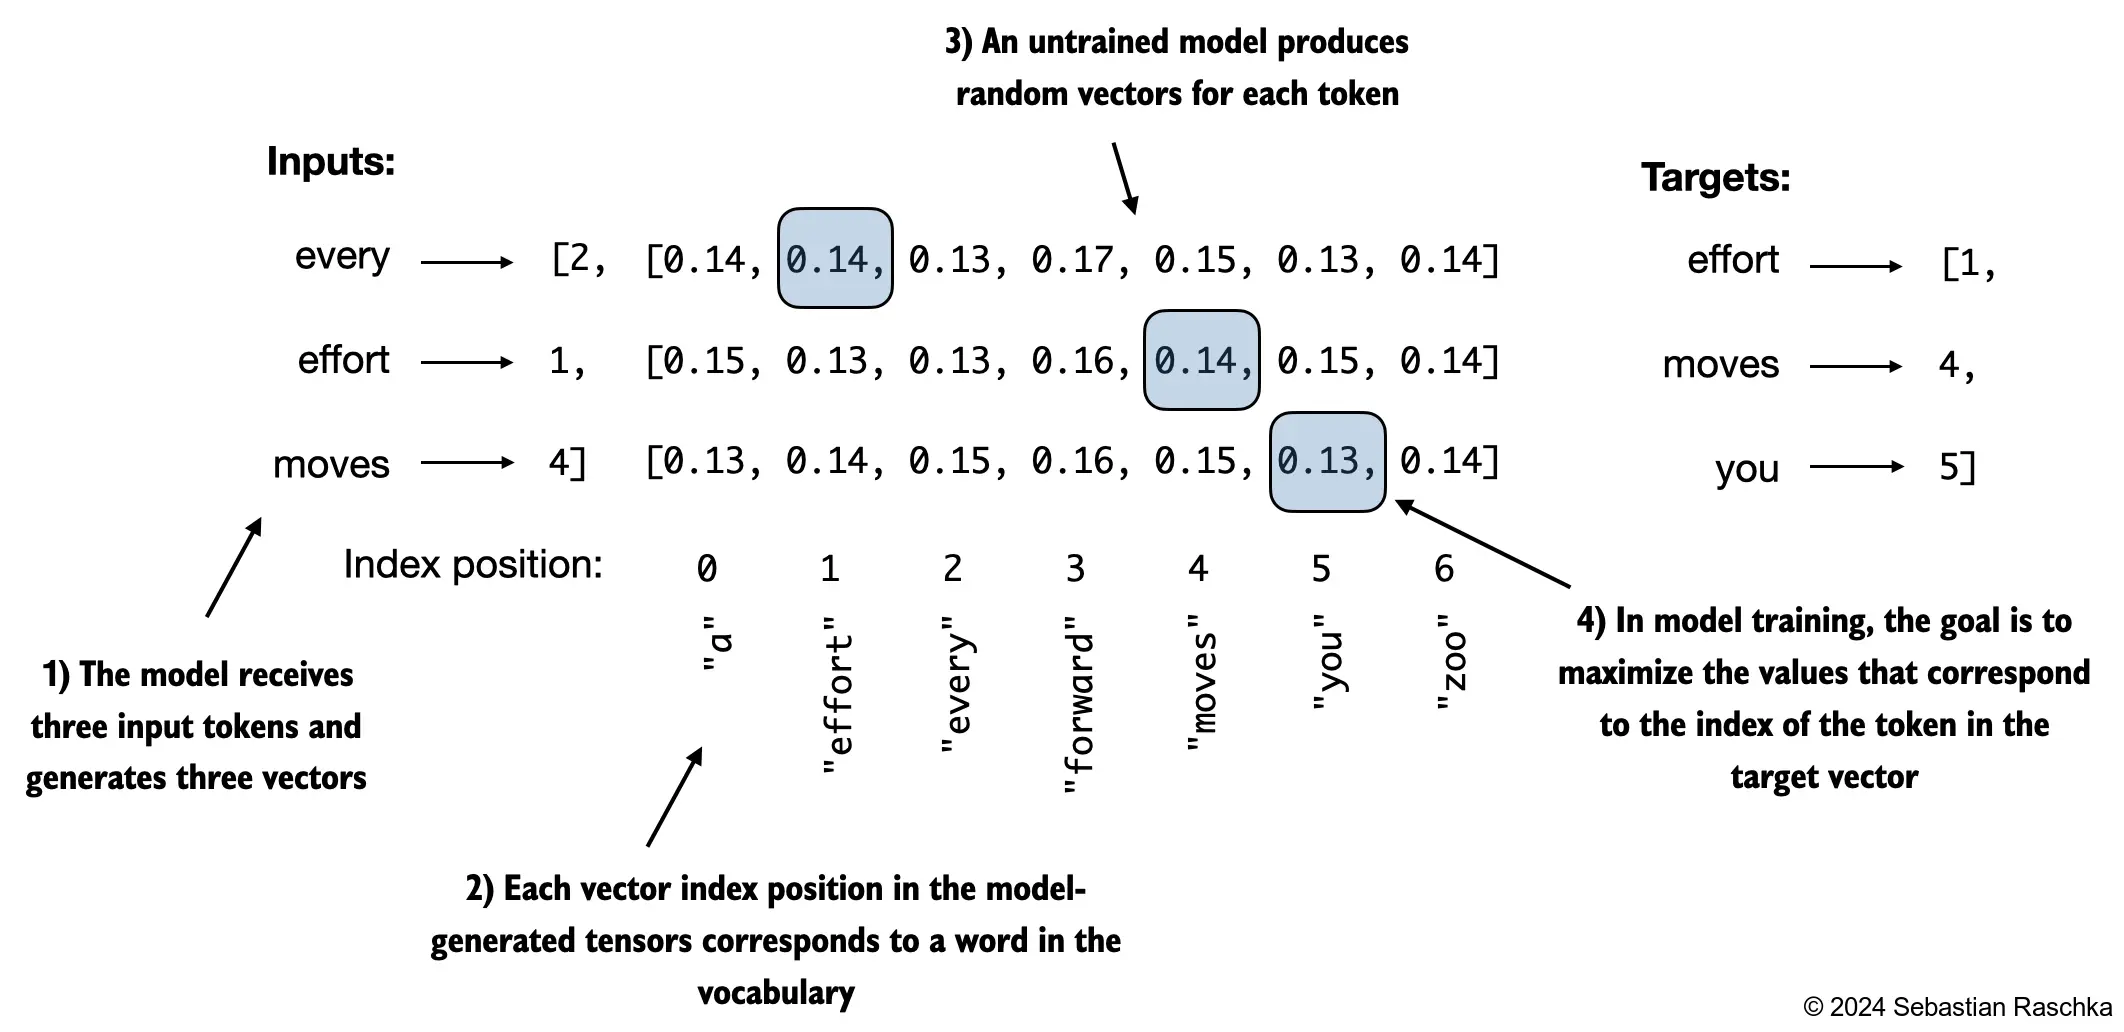

In [2]:
import tiktoken

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # 变为batch
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # 变成context
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = GPT2.generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens = 10,
    context_size=GPT_CONFIG_124M["context_length"]    
)

print("Outputs IDs: \n", token_ids)

print("Outputs text: \n", token_ids_to_text(token_ids, tokenizer))

Outputs IDs: 
 tensor([[ 6109,  3626,  6100,   345, 48181,  6168,  4209, 42888,  5918, 33499,
         30916,  9500, 33191, 30637]])
Outputs text: 
 Every effort moves youSupported Services somew Rumblerazy citationsWidth DiegoGWestones


In [3]:

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # 变成context
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = GPT2.generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens = 10,
    context_size=GPT_CONFIG_124M["context_length"]    
)

print("Outputs IDs: \n", token_ids)

print("Outputs text: \n", token_ids_to_text(token_ids, tokenizer))

Outputs IDs: 
 tensor([[ 6109,  3626,  6100,   345, 48181,  6168,  4209, 42888,  5918, 33499,
         30916,  9500, 33191, 30637]])
Outputs text: 
 Every effort moves youSupported Services somew Rumblerazy citationsWidth DiegoGWestones


In [4]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]

targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [1107,  588, 11311]]) #  " really like chocolate"]

with torch.no_grad():
    logits = model(inputs)

probas = torch.softmax(logits, dim=-1)
print(probas.shape)
print(probas)

torch.Size([2, 3, 50257])
tensor([[[8.4163e-06, 6.8410e-06, 1.8523e-05,  ..., 1.5102e-05,
          8.9306e-06, 1.2856e-05],
         [6.6614e-06, 7.3341e-06, 1.2488e-05,  ..., 2.6544e-05,
          6.8119e-06, 8.3111e-06],
         [1.4862e-05, 8.9706e-06, 2.7771e-05,  ..., 2.5133e-05,
          1.3059e-05, 1.1737e-05]],

        [[4.9869e-06, 7.5626e-06, 2.8921e-05,  ..., 1.8406e-05,
          2.1594e-05, 8.8943e-06],
         [2.5863e-06, 5.8260e-06, 1.2188e-05,  ..., 3.8229e-05,
          6.1748e-06, 5.6014e-06],
         [7.2780e-06, 9.5278e-06, 4.4258e-05,  ..., 9.1192e-06,
          2.1775e-05, 7.0663e-06]]])


In [5]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("token_ids:\n", token_ids)

token_ids:
 tensor([[[44459],
         [38410],
         [47147]],

        [[28272],
         [28105],
         [22388]]])


In [6]:
print(token_ids[0].flatten())

tensor([44459, 38410, 47147])


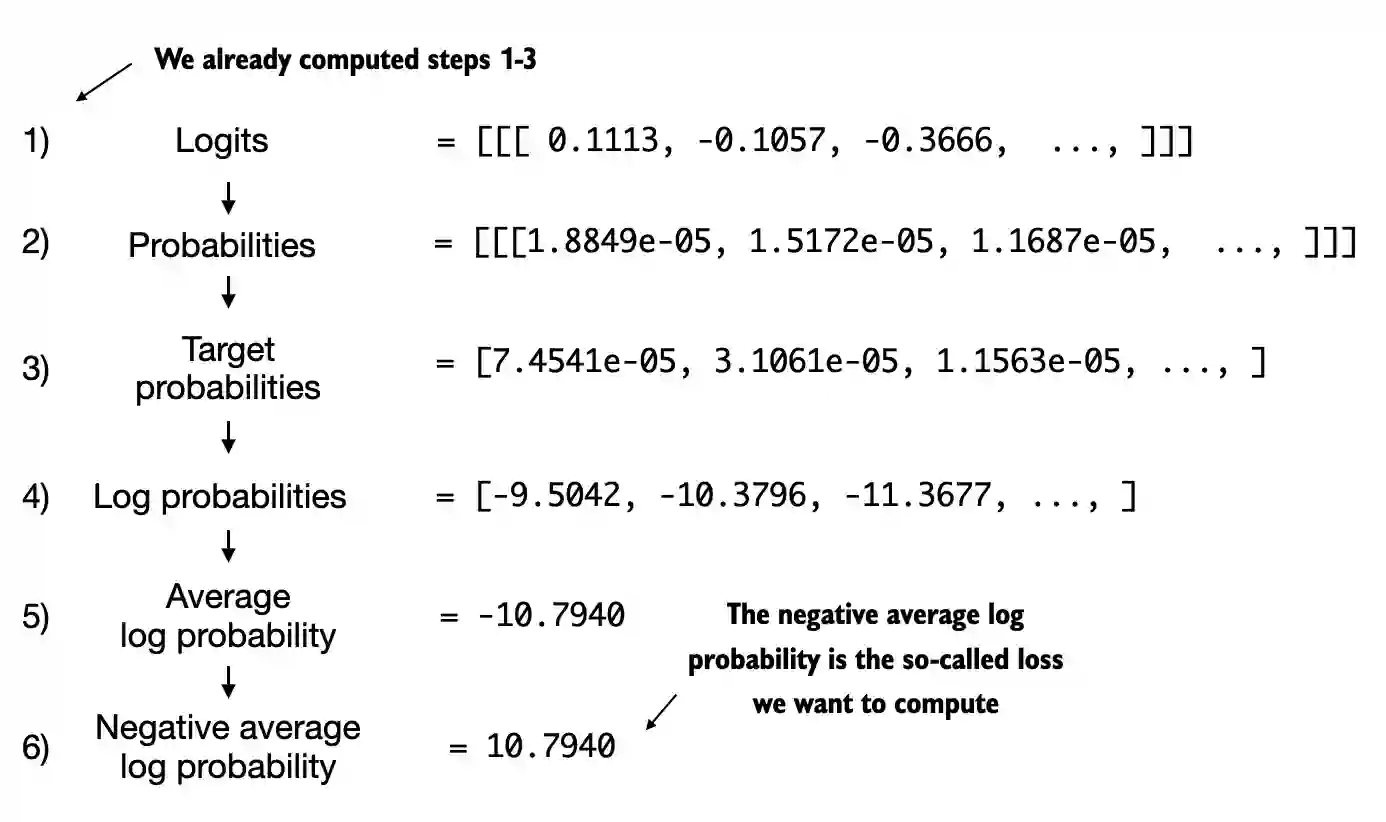

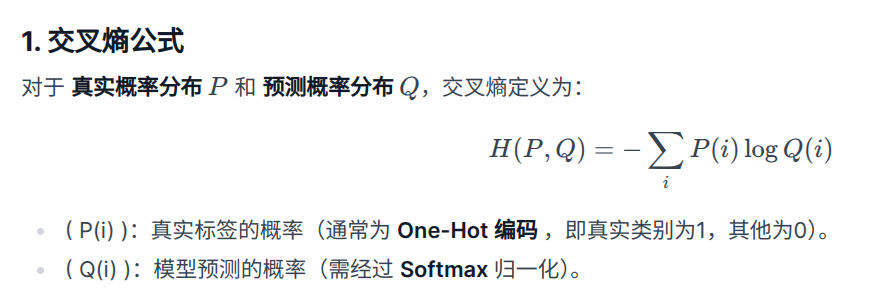

In [7]:
print(targets[0])
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

tensor([3626, 6100,  345])
Targets batch 1:  effort moves you
Outputs batch 1:  Rican Integrationlvl


In [8]:
text_idx = 0
target_probas_1 = probas[text_idx, [0,1,2], targets[text_idx]] # 正确结果位置上的预测结果
print("text 1:",target_probas_1)
# print(token_ids_to_text(target_probas_1, tokenizer))

text_idx = 1
target_probas_2 = probas[text_idx, [0,1,2], targets[text_idx]]
print("text 2:", target_probas_2)
# print(token_ids_to_text(target_probas_2, tokenizer))


text 1: tensor([5.3790e-05, 1.1804e-05, 1.2694e-05])
text 2: tensor([1.0724e-05, 2.1331e-05, 1.0938e-05])


**Entropy**

In [9]:
log_probas = torch.log(torch.cat((target_probas_1,  target_probas_2)))
avarage_log_probas = torch.mean(log_probas)
neg_av_log_probas = -1 * avarage_log_probas
print(neg_av_log_probas)

tensor(11.0123)


**Cross Entropy**

In [10]:
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)

logits_flat = logits.flatten(0,1)
targets_flat = targets.flatten(0,1)

print("Flattened logits:", logits_flat)
print("Flattebed targets:", targets_flat)

loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
# 语义对齐， 符合(N, C)和(N,)的要求。

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])
Flattened logits: tensor([[-0.6925, -0.8997,  0.0963,  ..., -0.1078, -0.6332, -0.2688],
        [-0.9271, -0.8308, -0.2986,  ...,  0.4554, -0.9047, -0.7058],
        [-0.1228, -0.6277,  0.5024,  ...,  0.4026, -0.2521, -0.3588],
        [-1.2194, -0.8030,  0.5384,  ...,  0.0865,  0.2462, -0.6408],
        [-1.8734, -1.0613, -0.3232,  ...,  0.8200, -1.0032, -1.1006],
        [-0.8400, -0.5706,  0.9652,  ..., -0.6145,  0.2559, -0.8695]])
Flattebed targets: tensor([ 3626,  6100,   345,  1107,   588, 11311])


交叉熵越小越好

# Evaluating the LLM

In [11]:
import os
import urllib.request

file_path = "data/the-verdict.txt"
url = "https://github.com/rasbt/LLMs-from-scratch/blob/main/ch02/01_main-chapter-code/the-verdict.txt"
if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

print(text_data[:100])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [12]:
import tiktoken
tokenizer = tiktoken.get_encoding('gpt2')

In [13]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Charachters:", total_characters)
print("Tokens:", total_tokens)

Charachters: 20479
Tokens: 5145


In [14]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        super().__init__()
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids)-max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, index):
        return self.input_ids[index], self.target_ids[index] 

def create_dataloader_v1(txt, max_length=256, stride=128,
                         batch_size=4, shuffle=True, drop_last=True, num_workers=0):
    
    tokenizer = tiktoken.get_encoding('gpt2')

    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle=shuffle,    # 参数打乱的是整个数据集在划分batch之前的顺序 
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [15]:
GPT_CONFIG_124M={
    "vocab_size": 50357,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [16]:
model = GPTModel(GPT_CONFIG_124M)
print(model)

GPTModel(
  (tok_emb): Embedding(50357, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features

In [17]:
train_ratio = 0.90
splite_idx = int(train_ratio * len(text_data))
train_data = text_data[:splite_idx]
val_data = text_data[splite_idx:]
print(val_data[:100])

torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M['context_length'],
    stride = GPT_CONFIG_124M['context_length'],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M['context_length'],
    stride=GPT_CONFIG_124M['context_length'],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

ue' collapsed like a house of cards. He didn't sneer, you understand, poor Stroud--he just lay there


In [18]:
if total_tokens * train_ratio < GPT_CONFIG_124M['context_length']:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

In [19]:
print("Train loader:")
for i,(x, y) in enumerate(train_loader):
    print(f'{i+1}th batch',x.shape, y.shape)

print("\nValidation loader:")
for i,(x, y) in enumerate(val_loader):
    print(f'{i+1}th batch',x.shape, y.shape)

Train loader:
1th batch torch.Size([2, 256]) torch.Size([2, 256])
2th batch torch.Size([2, 256]) torch.Size([2, 256])
3th batch torch.Size([2, 256]) torch.Size([2, 256])
4th batch torch.Size([2, 256]) torch.Size([2, 256])
5th batch torch.Size([2, 256]) torch.Size([2, 256])
6th batch torch.Size([2, 256]) torch.Size([2, 256])
7th batch torch.Size([2, 256]) torch.Size([2, 256])
8th batch torch.Size([2, 256]) torch.Size([2, 256])
9th batch torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
1th batch torch.Size([2, 256]) torch.Size([2, 256])


In [20]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel() # 计算这个张量中所有元素的数量


val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Training tokens: 4608
Validation tokens: 512
All tokens: 5120


In [21]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader)==0:
        return float('nan')
    elif num_batches is None:
        num_batches = len(data_loader) # 默认全部批次
    else:
        num_batches = min(num_batches, len(data_loader))
    
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    
    return total_loss / num_batches

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

model.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(train_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 11.013159116109213
Validation loss: 11.009046978420681
